In [28]:
! pip install tensorflow numpy scikit-learn matplotlib seaborn


In [29]:
# Import data
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [30]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [31]:
# Normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [32]:
# One-hot encode labels
y_train_encoded = keras.utils.to_categorical(y_train, 10)
y_val_encoded = keras.utils.to_categorical(y_test, 10)

In [33]:
# Data checking
print("Forme des données:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Forme des données:
x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)


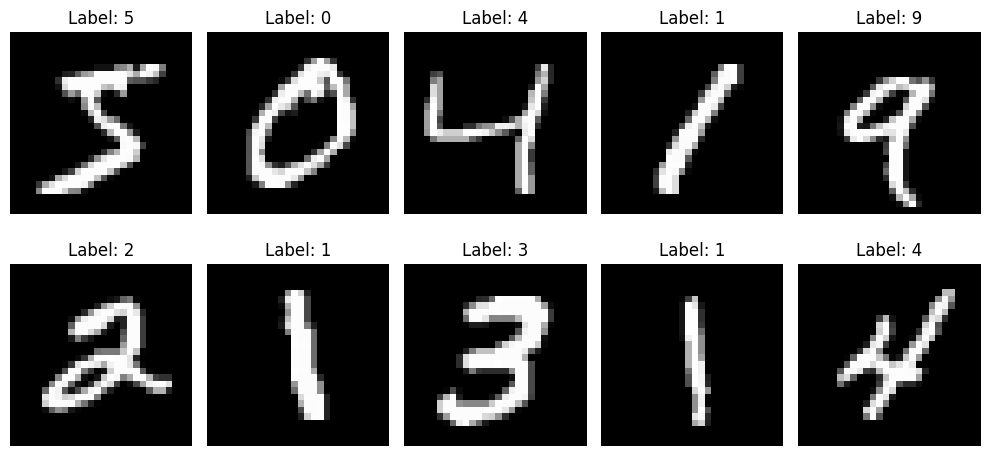

In [34]:
# Data visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

2. Build a Fully Connected Neural Network

In [35]:
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

#3. Train the Neural Network

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8220 - loss: 0.5845 - val_accuracy: 0.9602 - val_loss: 0.1341 - learning_rate: 0.0010
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9503 - loss: 0.1635 - val_accuracy: 0.9691 - val_loss: 0.1046 - learning_rate: 0.0010
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9616 - loss: 0.1212 - val_accuracy: 0.9718 - val_loss: 0.0958 - learning_rate: 0.0010
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9694 - loss: 0.1007 - val_accuracy: 0.9753 - val_loss: 0.0866 - learning_rate: 0.0010
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9735 - loss: 0.0848 - val_accuracy: 0.9753 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9741 - loss: 0.0778 - val_accuracy: 0.9768 - val_loss: 0.0777 - learning_rate: 0.0010
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9795 - loss: 0.06

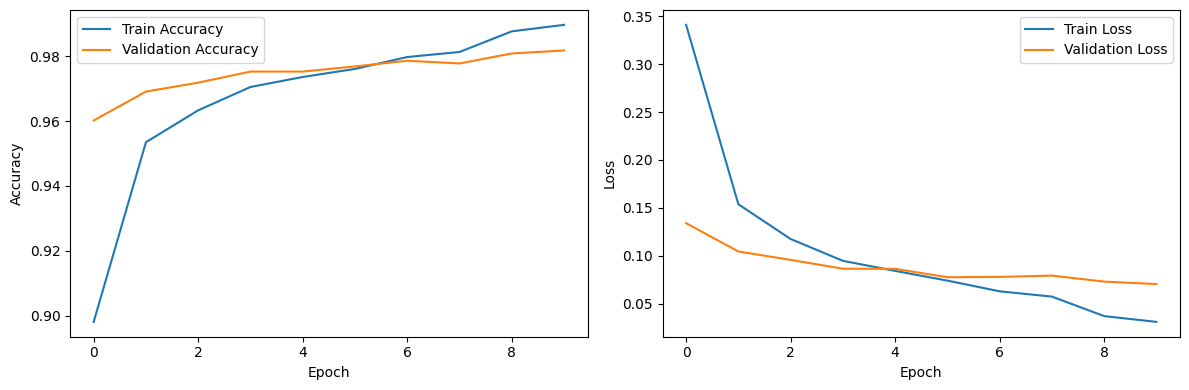

In [36]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2)
]

history = model.fit(x_train, y_train_encoded,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=1)

# Results visualizzation

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


4. Evaluate the Model's Performance

313/313 - 1s - 3ms/step - accuracy: 0.9829 - loss: 0.0612

Test accuracy: 0.9829
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


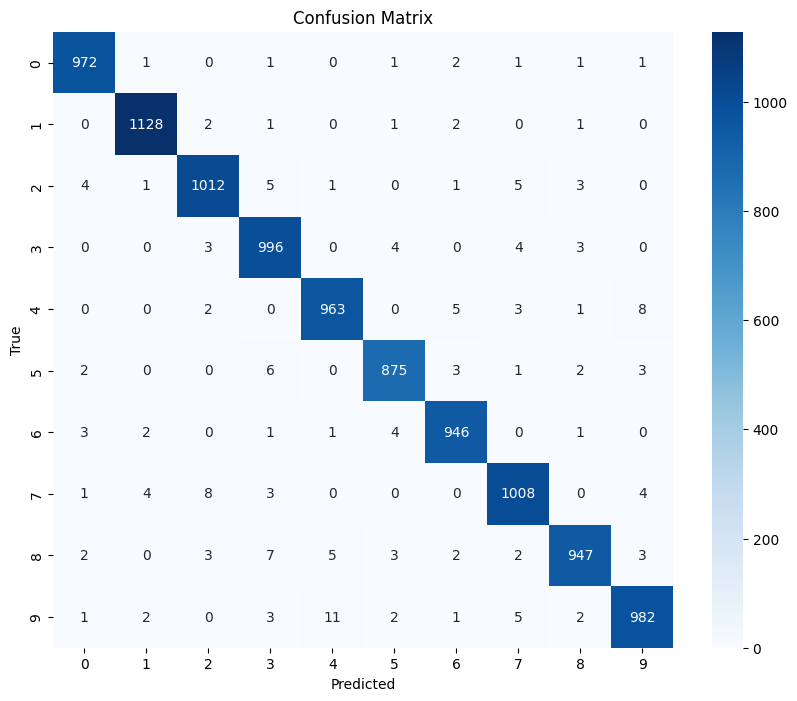

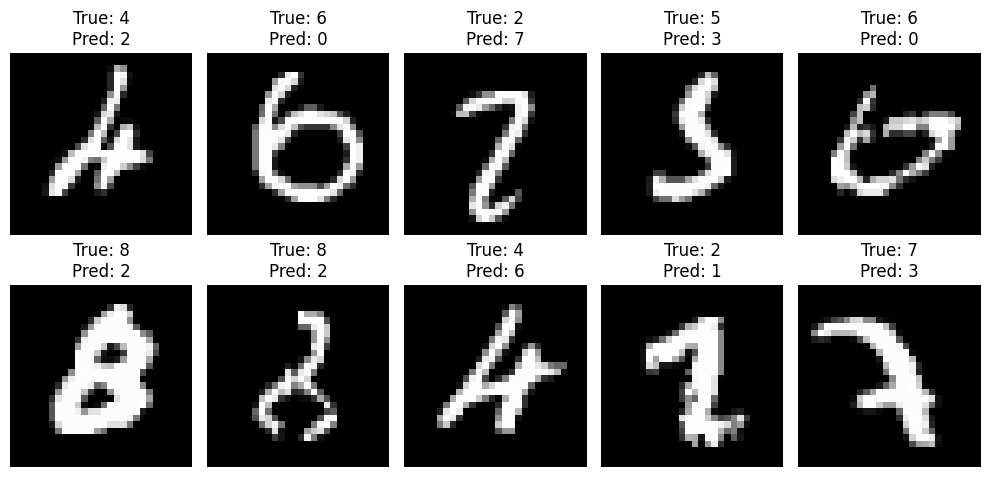

In [37]:
y_test_encoded = keras.utils.to_categorical(y_test, 10)
test_loss, test_acc = model.evaluate(x_test, y_val_encoded, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display some misclassified examples
errors = (y_pred_classes != y_true_classes)
error_images = x_test[errors]
error_pred = y_pred_classes[errors]
error_true = y_true_classes[errors]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(error_images[i], cmap='gray')
    plt.title(f"True: {error_true[i]}\nPred: {error_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()




Bonus: Hyperparameter Tuning Experiment

In [ ]:
# %% Partie 7 - Hyperparameter tuning
def tune_model():
    hidden_units_list = [128, 256, 512]
    learning_rates = [0.01, 0.001, 0.0001]

    results = []
    for units in hidden_units_list:
        for lr in learning_rates:
            print(f"\n--- Essai avec {units} unités et lr={lr} ---")

            # building the model with classical datas
            model = keras.Sequential([
                keras.layers.Flatten(input_shape=(28, 28)),
                keras.layers.Dense(units, activation='relu'),
                keras.layers.Dropout(0.3),
                keras.layers.Dense(10, activation='softmax')
            ])

            model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

            # Training
            history = model.fit(x_train, y_train_encoded,
                              epochs=5,
                              batch_size=64,
                              validation_split=0.2,
                              verbose=1)  # Mettre à 1 pour voir la progression

            val_acc = max(history.history['val_accuracy'])
            results.append({
                'units': units,
                'learning_rate': lr,
                'val_accuracy': val_acc,
                'history': history.history
            })

            print(f"\nRésultat: Val_accuracy = {val_acc:.4f}\n{'-'*40}")

    # datas
    print("\n\nRésultats finaux du tuning:")
    print("{:<10} {:<15} {:<10}".format('Unités', 'Learning Rate', 'Val Accuracy'))
    for res in results:
        print("{:<10} {:<15} {:<10.4f}".format(
            res['units'],
            res['learning_rate'],
            res['val_accuracy']))

    return results

# Tuning
tuning_results = tune_model()

# Visualization
plt.figure(figsize=(12, 6))
for res in tuning_results:
    label = f"{res['units']} units, lr={res['learning_rate']}"
    plt.plot(res['history']['val_accuracy'], label=label)

plt.title('Validation Accuracy pour différentes configurations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


--- Essai avec 128 unités et lr=0.01 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8554 - loss: 0.4648 - val_accuracy: 0.9532 - val_loss: 0.1650
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9261 - loss: 0.2481 - val_accuracy: 0.9567 - val_loss: 0.1559
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9372 - loss: 0.2169 - val_accuracy: 0.9597 - val_loss: 0.1651
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9408 - loss: 0.2045 - val_accuracy: 0.9613 - val_loss: 0.1554
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9450 - loss: 0.1930 - val_accuracy: 0.9657 - val_loss: 0.1409

Résultat: Val_accuracy = 0.9657
----------------------------------------

--- Essai avec 128 unités et lr=0.001 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8095 - loss: 0.6436 - val_accuracy: 0.9477 - val_loss: 0.1868
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9380 - loss: 0.2172 - val_accuracy: 0.9590 - val_loss: 0.1418
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9505 - loss: 0.1639 - val_accuracy: 0.9638 - val_loss: 0.1185
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9588 - loss: 0.1365 - val_accuracy: 0.9698 - val_loss: 0.1017
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9637 - loss: 0.1139 - val_accuracy: 0.9712 - val_loss: 0.0953

Résultat: Val_accuracy = 0.9712
----------------------------------------

--- Essai avec 128 unités et lr=0.0001 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5402 - loss: 1.5114 - val_accuracy: 0.8964 - val_loss: 0.4550
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8593 - loss: 0.5113 - val_accuracy: 0.9169 - val_loss: 0.3290
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8891 - loss: 0.3943 - val_accuracy: 0.9263 - val_loss: 0.2795
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9043 - loss: 0.3357 - val_accuracy: 0.9327 - val_loss: 0.2500
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9140 - loss: 0.3016 - val_accuracy: 0.9376 - val_loss: 0.2282

Résultat: Val_accuracy = 0.9376
----------------------------------------

--- Essai avec 256 unités et lr=0.01 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8659 - loss: 0.4356 - val_accuracy: 0.9525 - val_loss: 0.1587
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9332 - loss: 0.2298 - val_accuracy: 0.9601 - val_loss: 0.1554
Epoch 3/5
171/750 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9421 - loss: 0.1908